In [ ]:
import numpy
from urllib.request import urlopen
import scipy.optimize
import random

In [ ]:
def parseDataFromURL(fname):
    for l in urlopen(fname):
        yield eval(l)

In [10]:
def parseData(fname):
    for l in open(fname):
        yield eval(l)

In [11]:
print("Reading data...")
data = list(parseData("beer_50000.json"))
print("Done reading data...")

Reading data...
Done reading data...


### This is to check whether the basic Linear Algebra Subroutines work properly

In [13]:
def feature(datum):
    features = [1, datum['user/ageInSeconds']]
    return features

In [14]:
print(data[0])

{'review/appearance': 2.5, 'beer/style': 'Hefeweizen', 'review/palate': 1.5, 'review/taste': 1.5, 'beer/name': 'Sausa Weizen', 'review/timeUnix': 1234817823, 'beer/ABV': 5.0, 'beer/beerId': '47986', 'beer/brewerId': '10325', 'review/timeStruct': {'isdst': 0, 'mday': 16, 'hour': 20, 'min': 57, 'sec': 3, 'mon': 2, 'year': 2009, 'yday': 47, 'wday': 0}, 'review/overall': 1.5, 'review/text': 'A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana.', 'user/profileName': 'stcules', 'review/aroma': 2.0}


### This is an example on how to use the Linalg Least Squares Model

In [15]:
# y = m x + c (Given x and y, find out m and c using the Linalg least squares model)
x = numpy.array([0, 1, 2, 3])
y = numpy.array([-1, 0.2, 0.9, 2.1])
# The input that the linalg least squares models takes are matrices for x and y.
# numpy.vstack() is used to stack the arrays row-wise.
A = numpy.vstack([x, numpy.ones(len(x))]).T
m, c = numpy.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

0.9999999999999999 -0.9499999999999997


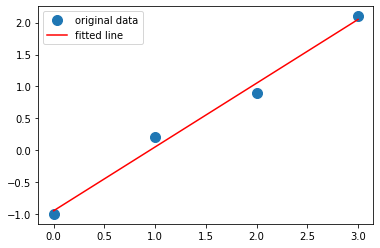

In [8]:
import matplotlib.pyplot as plt
_ = plt.plot(x, y, 'o', label = 'original data', markersize = 10)
_ = plt.plot(x, m*x + c, 'r', label = 'fitted line')
_ = plt.legend()
plt.show()

In [17]:
beer_data = [d for d in data if 'user/gender' in d]
beer_data

[{'review/appearance': 4.0,
  'beer/style': 'American Double / Imperial IPA',
  'review/palate': 4.0,
  'review/taste': 4.5,
  'beer/name': 'Cauldron DIPA',
  'review/timeUnix': 1293735206,
  'user/gender': 'Male',
  'user/birthdayRaw': 'Jun 16, 1901',
  'beer/ABV': 7.7,
  'beer/beerId': '64883',
  'user/birthdayUnix': -2163081600,
  'beer/brewerId': '1075',
  'review/timeStruct': {'isdst': 0,
   'mday': 30,
   'hour': 18,
   'min': 53,
   'sec': 26,
   'mon': 12,
   'year': 2010,
   'yday': 364,
   'wday': 3},
  'user/ageInSeconds': 3581417047,
  'review/overall': 4.0,
  'review/text': "According to the website, the style for the Caldera Cauldron changes every year. The current release is a DIPA, which frankly is the only cauldron I'm familiar with (it was an IPA/DIPA the last time I ordered a cauldron at the horsebrass several years back). In any event... at the Horse Brass yesterday.\t\tThe beer pours an orange copper color with good head retention and lacing. The nose is all hoppy 

In [16]:
X = [feature(d) for d in data]
y = [d['review/overall'] for d in data]
theta, residuals, rank, s = numpy.linalg.lstsq(X, y)

KeyError: 'user/ageInSeconds'

In [ ]:
print(type(theta))
print(residuals)
print(rank)
print(s)

_ = plt.plot(X, y, 'o', label = 'original data', markersize = 10)
_ = plt.plot(X, theta*X + residuals, 'r', label = 'fitted line')
_ = plt.legend()
plt.show()

### Convince ourselves that basic linear algebra operations provide the same result

In [ ]:
import numpy

X = numpy.matrix(X)
Y = numpy.matrix(y)
numpy.linalg.inv(X.T * X) * X.T * Y.T